Dimensión de la matriz cuadrada: 2
2


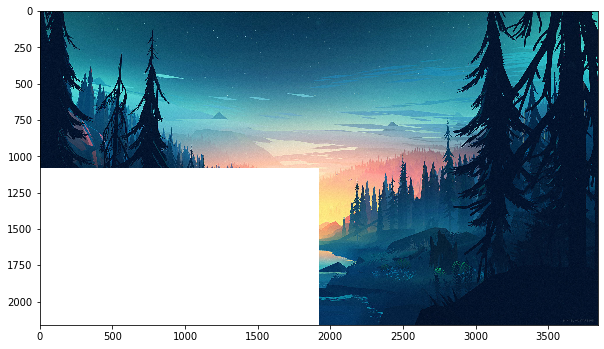

In [2]:
from PIL import Image, ImageChops
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
import random
import copy

tablero = np.array([])
posicion_blanco = 0
objetivo = np.array([])

def separar(imagen,cuantas): 
    data = copy.copy(np.vsplit(imagen,cuantas))
    for n, i in enumerate(data):
        data[n] = copy.copy(np.hsplit(np.asarray(i),cuantas))  
    return data
        
    
    
def encontrar_blanco(data,cuadro_blanco):
    contador = 0   
    for n,i in enumerate(data):
        for m,j in enumerate(data[n]):
            comparar = data[n][m] == cuadro_blanco
            if comparar.all():
                return contador 
            contador = contador + 1
        
        

def ubicar_blanco(data,blanco,cuadro_blanco):
    fila = list()
    contador = 0   
    for n,i in enumerate(data):
        columna = list()
        for m,j in enumerate(data[n]):
            if contador == blanco:
                data[n][m] = copy.copy(cuadro_blanco)
            columna.append(data[n][m]) 
            contador = contador + 1
        columna = np.concatenate(columna,axis=1)
        fila.append(columna)
    data = np.concatenate(fila,axis=0)
    return data



def mezclar_unir(a_modificar,original,orden):
    contador = 0
    mezclado = list()
    fila = list()
    for n,i in enumerate(original):
        for m,j in enumerate(original[n]):
            mezclado.append(original[n][m])

    for n,i in enumerate(original):
        columna = list()
        for m,j in enumerate(original):
            a_modificar[n][m] = mezclado[orden[contador]]
            contador += 1
            columna.append(a_modificar[n][m])
        columna = np.concatenate(columna,axis=1)
        fila.append(columna)
    original = np.concatenate(fila,axis=0)
    return original



def unir(data):
    fila = list()
    for n,i in enumerate(data):
        columna = list()
        for m,j in enumerate(data[n]):
            columna.append(data[n][m]) 
        columna = np.concatenate(columna,axis=1)
        fila.append(columna)
    data = np.concatenate(fila,axis=0)
    return data 



def jugar(mover,tablero_, matrix,blanco):
    clear_output()
    #print('Dentro de jugar:',matrix[0][0])
    if mover in matrix:
        blanco_f, blanco_c = np.where(matrix == blanco)
        blanco_f = copy.copy(blanco_f[0])
        blanco_c = copy.copy(blanco_c[0])
        #print('blanco_f:',blanco_f)
        #print('blanco_c',blanco_c)
        
        if mover != blanco:
            mov_f, mov_c = np.where(matrix == mover)
            mov_f = copy.copy(mov_f[0])
            mov_c = copy.copy(mov_c[0])
            #print('mov_f:',mov_f)
            #print('mov_c',mov_c)
            f_izq = mov_f - 1
            f_der = mov_f + 1
            c_arriba = mov_c - 1
            c_abajo = mov_c + 1

            f_arriba = mov_f - 1
            f_abajo = mov_f + 1
            c_izq = mov_c - 1 
            c_der = mov_c + 1

            if ((blanco_f == mov_f) and ((blanco_c == c_izq) or (blanco_c == c_der))) or ((blanco_c == mov_c) and ((blanco_f == f_arriba) or (blanco_f == f_abajo))):
                print('blanco_f',blanco_f)
                print('blanco_c',blanco_c)
                print('mov_f', mov_f),
                print('mov_c',mov_c)
                posicion_aux_blanco = copy.copy(tablero_[blanco_f][blanco_c])
                tablero_[blanco_f][blanco_c] = copy.copy(tablero_[mov_f][mov_c])
                tablero_[mov_f][mov_c] = copy.copy(posicion_aux_blanco)
                blanco = copy.copy(mover)
                print('Blanco')
            else:
                print('Movimiento no permitido')
                blanco = -100
        else:
            print('No se puede mover la pieza en blanco')
            blanco = -200
    else:
        print('Elemento no encontrado')
        blanco = -300
            
    resultado = {
        "blanco": blanco,
        "tablero": copy.copy(tablero_)
    }
    return resultado
     
    
    
def verificar(tabl, obj):
    logrado = tabl == obj
    if logrado.all():
        print('LOGRADO !!')
        return True
    else:
        return False
        
       
    
def proceso(orden,objetivo,tabl, blanco,cuantas):
    fin = False
    tablero = copy.copy(tabl)
    posicion_blanco = copy.copy(blanco)
    #plt.imshow(tablero)
    while fin == False:
        mover = int(input('Cuál desea mover: '))
        posicion_blanco_aux = copy.copy(posicion_blanco)
        resultado = jugar(mover,tablero,orden,posicion_blanco)
        posicion_blanco = copy.copy(resultado["blanco"])
        print('posicion_blanco:',posicion_blanco)
        if posicion_blanco >= 0:
            tablero_ = copy.copy(resultado["tablero"])
            tablero = unir(tablero_)
            print('buen retorno')
            fin = verificar(tablero,objetivo)
        elif posicion_blanco == -100 or posicion_blanco == -200 or posicion_blanco == -300:
            posicion_blanco = copy.copy(posicion_blanco_aux)
        
        plt.imshow(tablero)
        plt.show()
        tablero = separar(tablero,cuantas)
            
    
    
#def graficar(data):
    
    
################################################

plt.rcParams['figure.figsize'] = (10,7)

original = plt.imread('imagen.jpg')
cuantas = int(input('Dimensión de la matriz cuadrada: '))
piezas = cuantas*cuantas

data = separar(original,cuantas)
altura,largo = [[data[0][0].shape][0][0], [data[0][0].shape][0][1]]   # Obtener dimensiones para el cuadro blanco

cuadro_blanco = np.zeros([altura,largo,3],dtype=np.uint8)
cuadro_blanco.fill(255) # Lleno el cuadro blanco

blanco = np.random.randint(piezas) # Obtengo número randómico
print(blanco)

objetivo = ubicar_blanco(data,blanco,cuadro_blanco) # objetivo es una array
#print(objetivo.shape) # dimensiones (2160, 3840, 3)
plt.imshow(objetivo)

3
[[0 1]
 [2 3]]


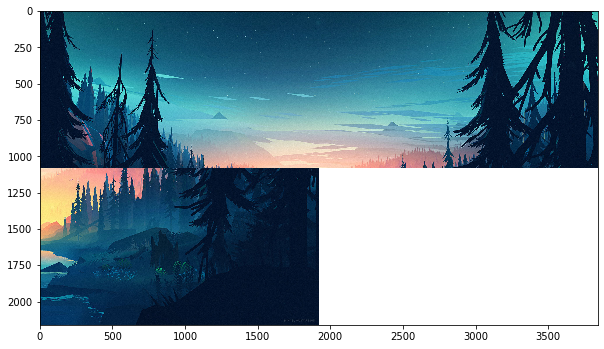

In [3]:
# Proceso para hacer un shuffle
data = separar(objetivo,cuantas)
orden = np.arange(piezas)
random.shuffle(orden)
data = mezclar_unir(data,copy.copy(data), orden)
data = separar(data,cuantas)
#imagen = copy.copy(data)
posicion_blanco = encontrar_blanco(data,cuadro_blanco)
print(posicion_blanco)
tablero = copy.copy(unir(data))
orden = np.arange(piezas)
orden = orden.reshape(cuantas,cuantas)
print(orden)
plt.imshow(tablero)

blanco_f 1
blanco_c 1
mov_f 1
mov_c 0
Blanco
posicion_blanco: 2
buen retorno
LOGRADO !!


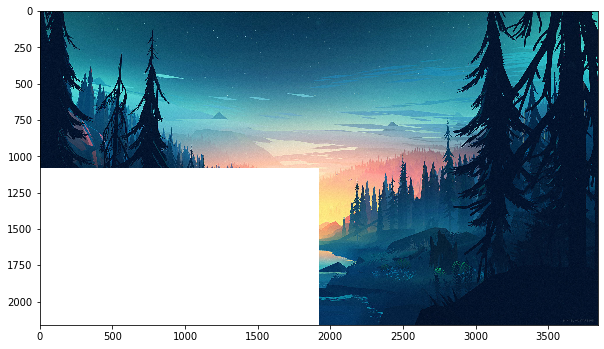

In [4]:
proceso(orden,objetivo,data, posicion_blanco,cuantas)